Import File and Read Sequences from FASTA File

In [89]:
from Bio import SeqIO

seq_x = SeqIO.read('x.fasta', 'fasta').seq
seq_y = SeqIO.read('y.fasta', 'fasta').seq

seq_x = seq_x.replace('N', '')

1. Sequence Manipulation

In [90]:
from collections import Counter

print(Counter(seq_x))
print(Counter(seq_y))

Counter({'G': 524, 'C': 515, 'A': 462, 'T': 364})
Counter({'C': 315, 'G': 286, 'A': 234, 'T': 215})


In [91]:
# Total length

print(f"Total length of Sequence X = {len(seq_x)}")
print(f"Total length of Sequence Y = {len(seq_y)}")

Total length of Sequence X = 1865
Total length of Sequence Y = 1050


In [92]:
# Index where first time CGC appears

print(f"Codon CGC appears first time in Sequence X at index = {seq_x.find('CGC')}")
print(f"Codon CGC appears first time in Sequence Y at index = {seq_y.find('CGC')}")

Codon CGC appears first time in Sequence X at index = 51
Codon CGC appears first time in Sequence Y at index = 39


In [93]:
# Create new sequence

seq_z1 = seq_x[:10] + seq_x[-5:]
seq_z2 = seq_y[:20] + seq_y[-3:]
seq_z = seq_z1 + seq_z2
seq_z = seq_z[::-1]

print(seq_z)

CAGACGGTTTCAAGGTGACTGTGACTGAGGTTGTGGTA


2. Sequence Analysis and Plotting

In [94]:
import matplotlib.pyplot as plt

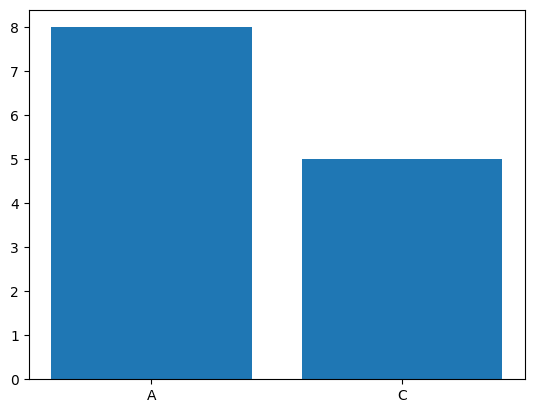

In [95]:
# Display nucleotide bases frequency (Bar Plot)

A_count = seq_z.count('A')
C_count = seq_z.count('C')

plt.bar(['A', 'C'], [A_count, C_count])
plt.show()

In [96]:
# Display GC and AT content percentage

from Bio.SeqUtils import gc_fraction as GC

GC_Z = GC(seq_z)
AT_Z = 1 - GC_Z
print(f"GC percentage in Sequence Z = {GC_Z * 100}%")
print(f"AT percentage in Sequence Z = {AT_Z * 100}%")

GC percentage in Sequence Z = 50.0%
AT percentage in Sequence Z = 50.0%


In [97]:
# Display melting temperature

from Bio.SeqUtils import MeltingTemp

wallace_mt = MeltingTemp.Tm_Wallace(seq_z)
print(f"Melting temperature for Sequence Z based on Wallace method = {wallace_mt}")

Melting temperature for Sequence Z based on Wallace method = 114.0


In [98]:
# Display molecular weight

from Bio.SeqUtils import molecular_weight

mw = molecular_weight(seq_z)
print(f"Molecular weight of Sequence Z = {mw}")

Molecular weight of Sequence Z = 11924.584100000002


3. DNA and mRNA Protein Synthesis

In [99]:
# Transcribe

mRNA = seq_z.transcribe()
print(f"mRNA sequence from Sequence Z = {mRNA}")

mRNA sequence from Sequence Z = CAGACGGUUUCAAGGUGACUGUGACUGAGGUUGUGGUA


In [100]:
# Translate

from Bio.SeqUtils import seq3

amino_acids = seq_z.translate()
print(f"Amino acids sequence from Sequence Z = {amino_acids}")
print(f"Amino acids sequence from Sequence Z = {seq3(amino_acids)}")

Amino acids sequence from Sequence Z = QTVSR*L*LRLW
Amino acids sequence from Sequence Z = GlnThrValSerArgTerLeuTerLeuArgLeuTrp


4. Sequence Alignment and Similarities

In [101]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [102]:
# Local alignment

local_alignment = pairwise2.align.localxx(seq_x, seq_y, score_only=True)
print(f"Local alignment score between Sequence X and Sequence Y = {local_alignment}")

Local alignment score between Sequence X and Sequence Y = 873.0


In [103]:
# Global alignment

global_alignment = pairwise2.align.globalxx(seq_y, seq_z, score_only=True)
print(f"Local alignment score between Sequence Y and Sequence Z = {global_alignment}")

Local alignment score between Sequence Y and Sequence Z = 38.0


In [104]:
# Hamming distance

def hamming_distance(seq_a, seq_b):
    count = 0
    for i,j in zip(seq_a, seq_b):
        if i != j:
            count += 1
    return count

print(f"Hamming distance between Sequence X and Sequence Y = {hamming_distance(seq_x, seq_y)}")

Hamming distance between Sequence X and Sequence Y = 755


In [105]:
# Levenshtein distance

import Levenshtein

print(f"Levenshtein distance between Sequence X and Sequence Y = {Levenshtein.distance(seq_x, seq_y)}")

Levenshtein distance between Sequence X and Sequence Y = 1028
